A partir de lo observado en el análisis de varios productos, veremos cómo se comporta todo al enfocarnos en un solo producto. Para ello tomé como referencia el refresco de lata.

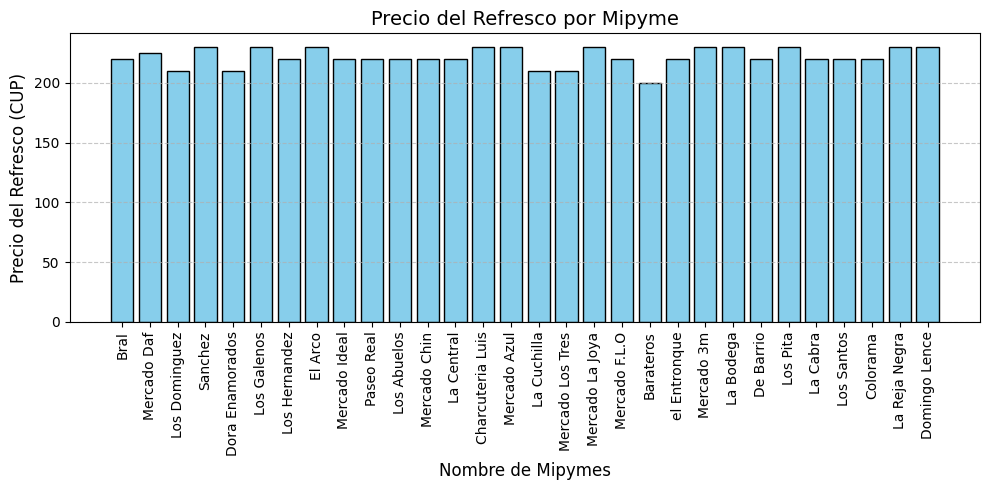

En el siguiente grafico observamos como en todas las mipymes de la provincia de Artemisa,el precio del Refresco de Lata supera los $200 excepto en 1
Ahora en caso de que queramos saber una cantidad de dinero con la cual podemos ir a Artemisa a comprarnos un Refresco de Lata,basta con analizar el promedio del precio de estas el cual es: 
$221.83333333333334
Pero esto seria un valor aproximado si queremos redondearlo bastaria con dejarlo en: 
$222


In [ ]:
from Funciones.biblioteca import open_json,promedio
import glob
import matplotlib.pyplot as plt
#Creo una variable llamada direcciones para almacenar el contenido de todos los json utilizando glob.glob , lo cual de una direccion que le asignemos nos recoge todos los archivos que en este caso terminen en .json
direcciones= glob.glob("./Mipymes/*.json")
#Creo una lista para almacenar todo el contenido que hay en direcciones
contenido = [ ]
for i in direcciones :
    contenido.append(dict(open_json(i)))
#Como voy a analizar el precio del refresco en las mipymes,creo una lista para almacenar todos los precios de las mipymes la cual tendria 30 precios ya que el refresco de lata es un preducto que se repite en todas 
precio_refresco_m = []
for x in contenido:
    for refresco in x["Productos"]:
       if refresco["nombre"]=="Refresco de Lata":
           precio_refresco_m.append(refresco["precio"])

nombre_mipymes = []
for mip in contenido:
        nombre_mipymes.append(mip["Nombre"])

#Datos
nombre_mipymes
precio_refresco_m
#Creo un gráfico de barras
plt.figure(figsize=(10, 5))  #Tamaño del gráfico
plt.bar(nombre_mipymes, precio_refresco_m, color="skyblue", edgecolor="black")

#Personalizacion:
plt.title("Precio del Refresco por Mipyme", fontsize=14)
plt.xlabel("Nombre de Mipymes", fontsize=12)
plt.ylabel("Precio del Refresco (CUP)", fontsize=12)
plt.xticks(rotation=90)  # Rotar etiquetas si son largas
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Muestro
plt.tight_layout()
plt.show()

print("En el siguiente grafico observamos como en todas las mipymes de la provincia de Artemisa,el precio del Refresco de Lata supera los $200 excepto en 1")

promedio_del_refresco = promedio(precio_refresco_m)
valor_del_refresco_redondeado = round(promedio_del_refresco)

print(f"Ahora en caso de que queramos saber una cantidad de dinero con la cual podemos ir a Artemisa a comprarnos un Refresco de Lata,basta con analizar el promedio del precio de estas el cual es: \n${promedio_del_refresco}")
print(f"Pero esto seria un valor aproximado si queremos redondearlo bastaria con dejarlo en: \n${valor_del_refresco_redondeado}")






Anteriormente vimos, a través del gráfico, el comportamiento del precio del refresco de lata en las mipymes de la provincia de Artemisa. Sin embargo, en nuestro país no solo se puede acceder a este producto mediante las mipymes, ya que la población también puede adquirirlo en las tiendas en MLC y USD que existen en las distintas provincias. En este caso, nos centraremos en las que están ubicadas en la provincia de Artemisa.

Dicho esto, pasemos a analizar el costo del refresco de lata en estas tiendas, teniendo en cuenta que, como estamos analizando únicamente precios, el valor es el mismo en todas ellas. Lo que cuesta un refresco de lata en una tienda en MLC es exactamente lo mismo que cuesta en una tienda en USD.

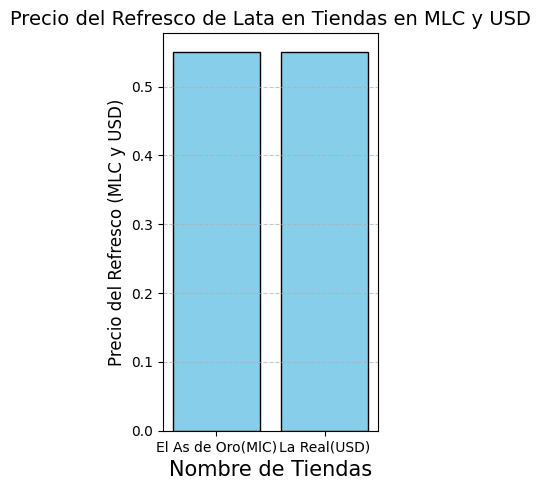

In [ ]:
#Declaro dos variables para almacenar la informacion en los json que guardan la informacion sobre las tiendas en mlc y usd 
tienda_mlc = open_json("Tiendas en MlC y USD/mlc.json")
tienda_usd = open_json("Tiendas en MlC y USD/usd.json")
#Creo dos listas para guardar la informacion que queremos sacar de estos en ellas
refresco_mlc = []
refresco_usd = []
#Itero sobre la informacion en las variables que declaramos anterirmente para sacar especificamente el precio del refresco y en el caso de la tienda de mlc
for m in tienda_mlc["Productos"]:
    if m["nombre"] == "Refresco de Lata":
        refresco_mlc.append(m["precio"])
for u in tienda_usd["Productos"]:
    if u["nombre"] == "Refresco de Lata":
        refresco_usd.append(u["precio"])
#Despues de haber accedido al valor especifico el cual es el precio lo guardo en las listas creadas anteriormente 

#Ahora para realizar un grafico que me muestre en mejor forma lo que estamos analizando haremos lo siguiente:
#Creo una lista para almacenar el valor del precio de ambas tiendas
precio_tiendas = []
for pm in refresco_mlc:
    precio_tiendas.append(pm)
for pu in refresco_usd:
    precio_tiendas.append(pu)

#Datos
nombre_tiendas = ["El As de Oro(MlC)","La Real(USD)"]
precio_tiendas 
#Creo gráfico de barras
plt.figure(figsize=(3, 5))  # Tamaño del gráfico
plt.bar(nombre_tiendas, precio_tiendas, color="skyblue", edgecolor="black")

#Personalizacion
plt.title("Precio del Refresco de Lata en Tiendas en MLC y USD", fontsize=14)
plt.xlabel("Nombre de Tiendas", fontsize=15)
plt.ylabel("Precio del Refresco (MLC y USD)", fontsize=12)
plt.xticks(rotation=0)  # Rotar etiquetas si son largas
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Muestro
plt.tight_layout()
plt.show()

    

    


En el gráfico anterior podemos apreciar que el precio del refresco de lata tiene el mismo costo tanto en la tienda en MLC como en la tienda en USD. Sin embargo, esto no significa que su valor al cambio, teniendo en cuenta las tasas que adoptan el MLC y el USD en el mercado informal, sea idéntico. Todo lo contrario. Por esta razón, ahora realizaremos un análisis del comportamiento, es decir, de la evolución que presentan los precios de estas monedas según el mercado informal.

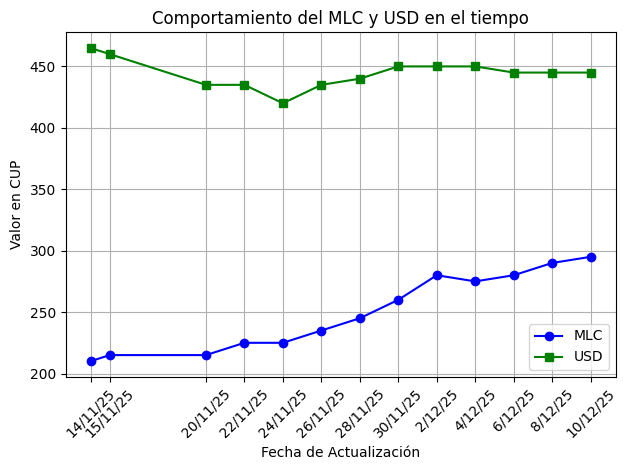

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
#Comienzo creando una variable que almacene la informacion recogida en los json de la carpeta Tasa de Cambio
direcciones_cambio = glob.glob("./Tasa de Cambio/*.json")
#Creo una lista para guardar la informacion a traves de la cual queremos acceder cuando iteremos sobre la informacion guardada en anteriormente
contenido_cambio = []
for k in direcciones_cambio:
    contenido_cambio.append(dict(open_json(k)))
#Creo una lista para almacenar las fechas de actualizacion de la moneda en el transcurso de la investigacion
fecha = []
for f in contenido_cambio:
    fecha.append(f["Fecha de Actualizacion"])
#Creo una lista para guardar los diferentes precios que ha tomado la moneda mlc en el transcurso de la investigacion
valor_cambiomlc = []
for preciomlc in contenido_cambio:
    for vprecio in preciomlc["Cambio"]:
        if vprecio["nombre"] == "MLC":
            valor_cambiomlc.append(vprecio["valor"])
#Creo una lista para guardar los diferentes precios que ha tomado la moneda usd en el transcurso de la investigacion
valor_cambiousd = []
for preciousd in contenido_cambio:
    for vprecio in preciousd["Cambio"]:
        if vprecio["nombre"] == "USD":
            valor_cambiousd.append(vprecio["valor"])

#Datos
fecha 
valor_cambiomlc 
valor_cambiousd 

#Convierto fechas y ordeno todo
fechas_convertidas = [datetime.strptime(f, "%d/%m/%y") for f in fecha]
datos = list(zip(fechas_convertidas, valor_cambiomlc, valor_cambiousd))
datos.sort()  # ordena por fecha

#Separo datos ya ordenados
fechas_ordenadas = [d[0] for d in datos]
mlc_ordenado = [d[1] for d in datos]
usd_ordenado = [d[2] for d in datos]

#Grafico
plt.plot(fechas_ordenadas, mlc_ordenado, 'o-b', label='MLC')
plt.plot(fechas_ordenadas, usd_ordenado, 's-g', label='USD')
plt.xticks(rotation=45)
plt.title("Comportamiento del MLC y USD en el tiempo")
plt.xlabel("Fecha de Actualización")
plt.ylabel("Valor en CUP")
plt.legend()
plt.grid(True)
#Uso las fechas originales como etiquetas
plt.xticks(ticks=fechas_convertidas, labels=fecha, rotation=45)
plt.tight_layout()

plt.show()


Analizando el gráfico mostrado en pantalla, vemos que la diferencia de precios es muy grande. Por ejemplo, el 14/11/25 el MLC costaba más de $200 y menos de $250, mientras que el USD se encontraba entre más de $450 y menos de $460. De manera visual, podemos llegar a la conclusión de que resulta más conveniente comprar un refresco de lata en una tienda en MLC que en una tienda en USD.

Sin embargo, aquí estamos olvidando lo que costaba en una mipyme. Por esta razón, ahora realizaremos un análisis en el cual convertiremos el precio del refresco de lata de ambas tiendas, tomando como referencia el valor que tienen ambas monedas en el mercado informal, y los compararemos para observar cuál de estas tres opciones resulta más económica.

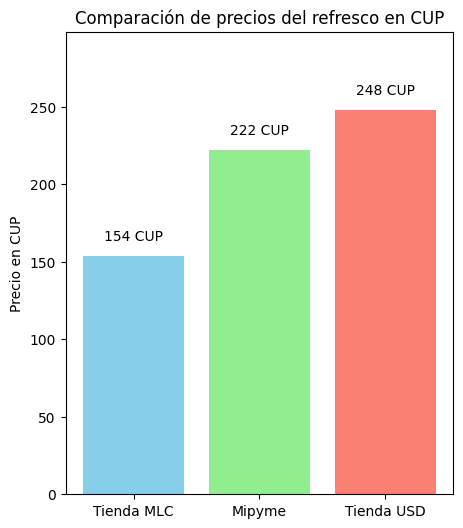

In [ ]:
from Funciones.biblioteca import convertir
import matplotlib.pyplot as plt
from operator import itemgetter  #se usa para ordenar listas de tuplas o listas de listas
#En estas tres variables tengo almacenado los siguientes valores:
valor_del_refresco_redondeado#promedio de lo que cuesta un refresco de lata en artemisa
refresco_mlc#el precio que tiene el refresco de lata en mlc
refresco_usd#el precio que tiene el refresco de lata en usd
valor_cambiomlc#precios del mlc durante el transcurso de la investigacion
valor_cambiousd#precios del usd durante el transcurso de la investigacion

#Ahora si queremos saber caunto cuesta un el refresco en cualquiera de las dos tiendas(MLC o USD) basta con multiplicar el valor que tiene en estas x el valor que le corresponde en el mercado informal
nv_mlc = convertir(refresco_mlc[0],valor_cambiomlc[-1])
nv_usd = convertir(refresco_usd[0],valor_cambiousd[-1])
#En este momento ya tendriamos lo que cuesta un refresco en (CUP) en las tiendas y en las mipymes solo faltaria compararlos 
#Creo una lista para almacenar el precio que tiene el Refresco de Lata en cada una de estas fuentes para ordenar cada uno de ellos y saber en cual es mas factible comprar
t_precioscup = []
t_precioscup.extend([nv_mlc,nv_usd,valor_del_refresco_redondeado])
#Para ordenar los valores de esta lista basta con utilizar el funcion sorted
orden = sorted(t_precioscup)

#Valores en CUP
nv_mlc 
nv_usd 
valor_del_refresco_redondeado

#Lista con nombre y valor
fuentes = [
    ("Tienda MLC", nv_mlc),
    ("Tienda USD", nv_usd),
    ("Mipyme", valor_del_refresco_redondeado)
]

#Ordenar por el segundo elemento (precio) usando itemgetter
fuentes.sort(key=itemgetter(1))

#Separo nombres y valores
nombres, valores = zip(*fuentes)

#Creo gráfico
plt.figure(figsize=(5, 6))#Tamaño del grafico
plt.bar(nombres, valores, color=["skyblue", "lightgreen", "salmon"])
plt.title("Comparación de precios del refresco en CUP")
plt.ylabel("Precio en CUP")

#Muestro  valores encima de cada barra
for i, v in enumerate(valores):
    plt.text(i, v + 10, f"{v} CUP", ha='center')
#Ajusto límite del eje Y
plt.ylim(0, max(valores) + 50)

plt.show()




Podemos observar en el gráfico anterior cómo influye el valor correspondiente al MLC y al USD en la tasa de cambio con respecto al producto analizado (refresco de lata). Pero debemos tener en cuenta que esto ocurre con todos los productos. Por lo tanto, el mismo análisis que realizamos con el refresco de lata podría aplicarse a cualquier otro producto, siempre que esté presente en las tres fuentes de información que contiene el proyecto.

Otra cosa que podríamos analizar es la evolución del precio del refresco de lata a medida que fueron variando el USD y el MLC según el mercado informal, así como su valor al cambio en CUP.

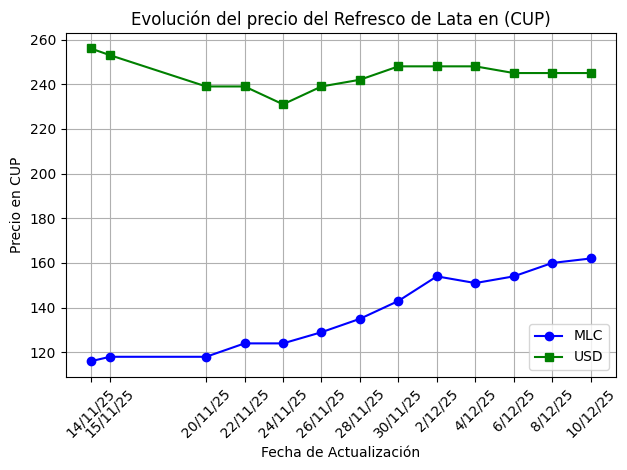

In [ ]:
#Recordando aqui tenemos almacenados los valores del refresco de lata en ambas tiendas el cual es el mismo
refresco_mlc
refresco_usd
#Recordando aqui tenemos almacenados los valores que tuvieron el mlc y el usd a lo largo de la investigacion
valor_cambiomlc
valor_cambiousd
#Evolucion
precio_cup_mlc = []
precio_cup_usd = []
for mlc in valor_cambiomlc:
    precio_cup_mlc.append(round(mlc*refresco_mlc[0]))
for usd in valor_cambiousd:
    precio_cup_usd.append(round(usd*refresco_mlc[0]))


#Datos
fecha 
precio_cup_mlc
precio_cup_usd

#Convierto fechas y ordenar todo
fechas_convertidas = [datetime.strptime(f, "%d/%m/%y") for f in fecha]
datos = list(zip(fechas_convertidas, precio_cup_mlc, precio_cup_usd))
datos.sort()  # ordena por fecha

#Separo datos ya ordenados
fechas_ordenadas = [d[0] for d in datos]
mlc_ordenado = [d[1] for d in datos]
usd_ordenado = [d[2] for d in datos]

#Grafico
plt.plot(fechas_ordenadas, mlc_ordenado, 'o-b', label='MLC')
plt.plot(fechas_ordenadas, usd_ordenado, 's-g', label='USD')
plt.xticks(rotation=45)
plt.title("Evolución del precio del Refresco de Lata en (CUP)")
plt.xlabel("Fecha de Actualización")
plt.ylabel("Precio en CUP")
plt.legend()
plt.grid(True)
#Uso las fechas originales como etiquetas
plt.xticks(ticks=fechas_convertidas, labels=fecha, rotation=45)
plt.tight_layout()

plt.show()

    


Con lo mostrado hasta ahora podemos reafirmar lo señalado en el análisis de todos los productos: el mercado informal influye de manera significativa en los precios de todo lo que necesitamos en el día a día. Esto se evidencia incluso tomando como referencia algo tan simple como una lata de refresco, que, a pesar de ser relativamente barata, presenta una marcada diferencia de precio a medida que pasa el tiempo y los valores del USD y el MLC se actualizan.